In [1]:
# importing libraries and loading data set


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)


In [2]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
statistics = df.describe(include='all')
missing_values = df.isnull().sum()

statistics, missing_values

(        customerID gender  SeniorCitizen Partner Dependents       tenure  \
 count         7043   7043    7043.000000    7043       7043  7043.000000   
 unique        7043      2            NaN       2          2          NaN   
 top     7590-VHVEG   Male            NaN      No         No          NaN   
 freq             1   3555            NaN    3641       4933          NaN   
 mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
 std            NaN    NaN       0.368612     NaN        NaN    24.559481   
 min            NaN    NaN       0.000000     NaN        NaN     0.000000   
 25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
 50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
 75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
 max            NaN    NaN       1.000000     NaN        NaN    72.000000   
 
        PhoneService MultipleLines InternetService OnlineSecurity  ...  \


In [5]:
data = {
    'customerID': ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU'],
    'gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': ['Yes', 'No', 'No', 'No', 'No'],
    'Dependents': ['No', 'No', 'No', 'No', 'No'],
    'tenure': [1, 34, 2, 45, 2],
    'PhoneService': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'MultipleLines': ['No phone service', 'No', 'No', 'No phone service', 'No'],
    'InternetService': ['DSL', 'DSL', 'DSL', 'DSL', 'Fiber optic'],
    'OnlineSecurity': ['No', 'Yes', 'Yes', 'No', 'No'],
    'OnlineBackup': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['No', 'Yes', 'No', 'Yes', 'No'],
    'TechSupport': ['No', 'No', 'No', 'Yes', 'No'],
    'StreamingTV': ['No', 'No', 'No', 'Yes', 'Yes'],
    'StreamingMovies': ['No', 'No', 'No', 'No', 'No'],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'One year', 'Month-to-month'],
    'PaperlessBilling': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Mailed check', 'Bank transfer (automatic)', 'Electronic check'],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70],
    'TotalCharges': ['29.85', '1889.5', '108.15', '1840.75', '151.65'],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes']
}


In [6]:
df_sample = pd.DataFrame(data)
df_sample['TotalCharges'] = pd.to_numeric(df_sample['TotalCharges'], errors='coerce')

df_sample_info = df_sample.info()
df_sample_statistics = df_sample.describe(include='all')
df_sample_missing_values = df_sample.isnull().sum()
df_sample_info, df_sample_statistics, df_sample_missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5 non-null      object 
 1   gender            5 non-null      object 
 2   SeniorCitizen     5 non-null      int64  
 3   Partner           5 non-null      object 
 4   Dependents        5 non-null      object 
 5   tenure            5 non-null      int64  
 6   PhoneService      5 non-null      object 
 7   MultipleLines     5 non-null      object 
 8   InternetService   5 non-null      object 
 9   OnlineSecurity    5 non-null      object 
 10  OnlineBackup      5 non-null      object 
 11  DeviceProtection  5 non-null      object 
 12  TechSupport       5 non-null      object 
 13  StreamingTV       5 non-null      object 
 14  StreamingMovies   5 non-null      object 
 15  Contract          5 non-null      object 
 16  PaperlessBilling  5 non-null      object 
 17  P

(None,
         customerID gender  SeniorCitizen Partner Dependents     tenure  \
 count            5      5            5.0       5          5   5.000000   
 unique           5      2            NaN       2          1        NaN   
 top     7590-VHVEG   Male            NaN      No         No        NaN   
 freq             1      3            NaN       4          5        NaN   
 mean           NaN    NaN            0.0     NaN        NaN  16.800000   
 std            NaN    NaN            0.0     NaN        NaN  21.087911   
 min            NaN    NaN            0.0     NaN        NaN   1.000000   
 25%            NaN    NaN            0.0     NaN        NaN   2.000000   
 50%            NaN    NaN            0.0     NaN        NaN   2.000000   
 75%            NaN    NaN            0.0     NaN        NaN  34.000000   
 max            NaN    NaN            0.0     NaN        NaN  45.000000   
 
        PhoneService MultipleLines InternetService OnlineSecurity  ...  \
 count           

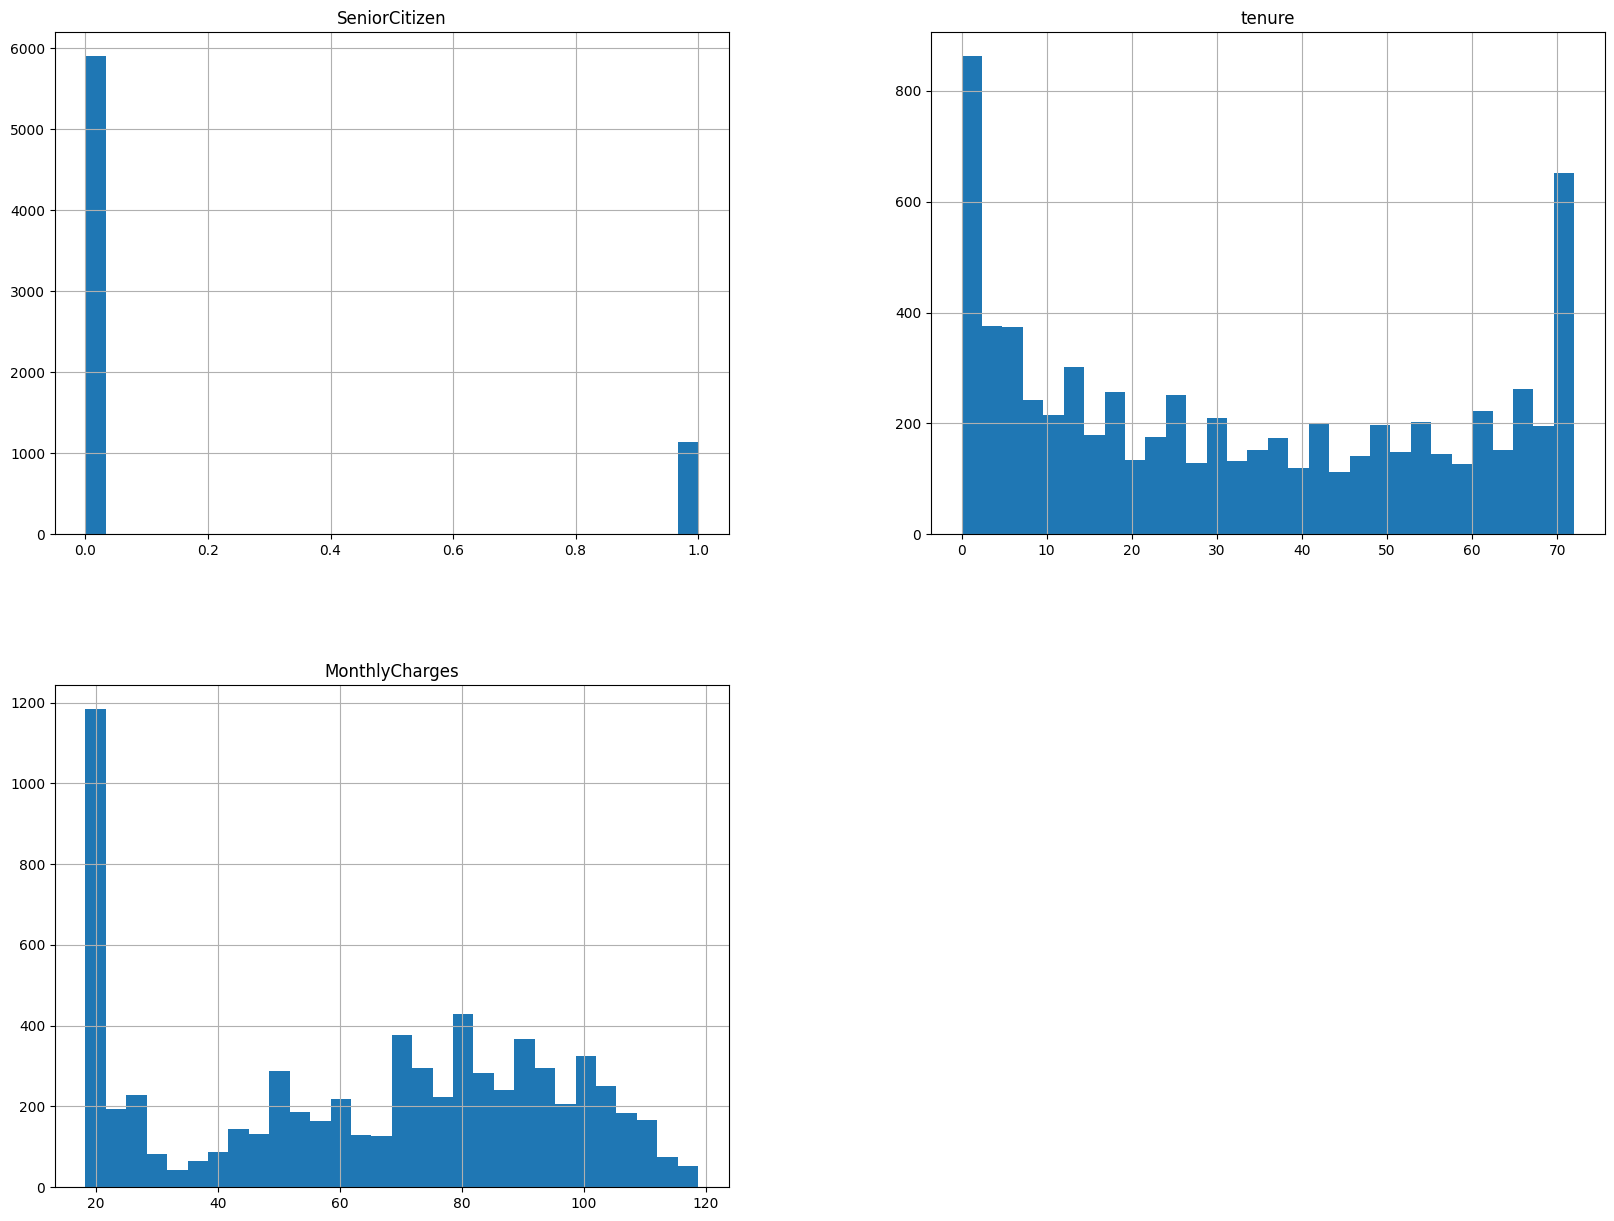

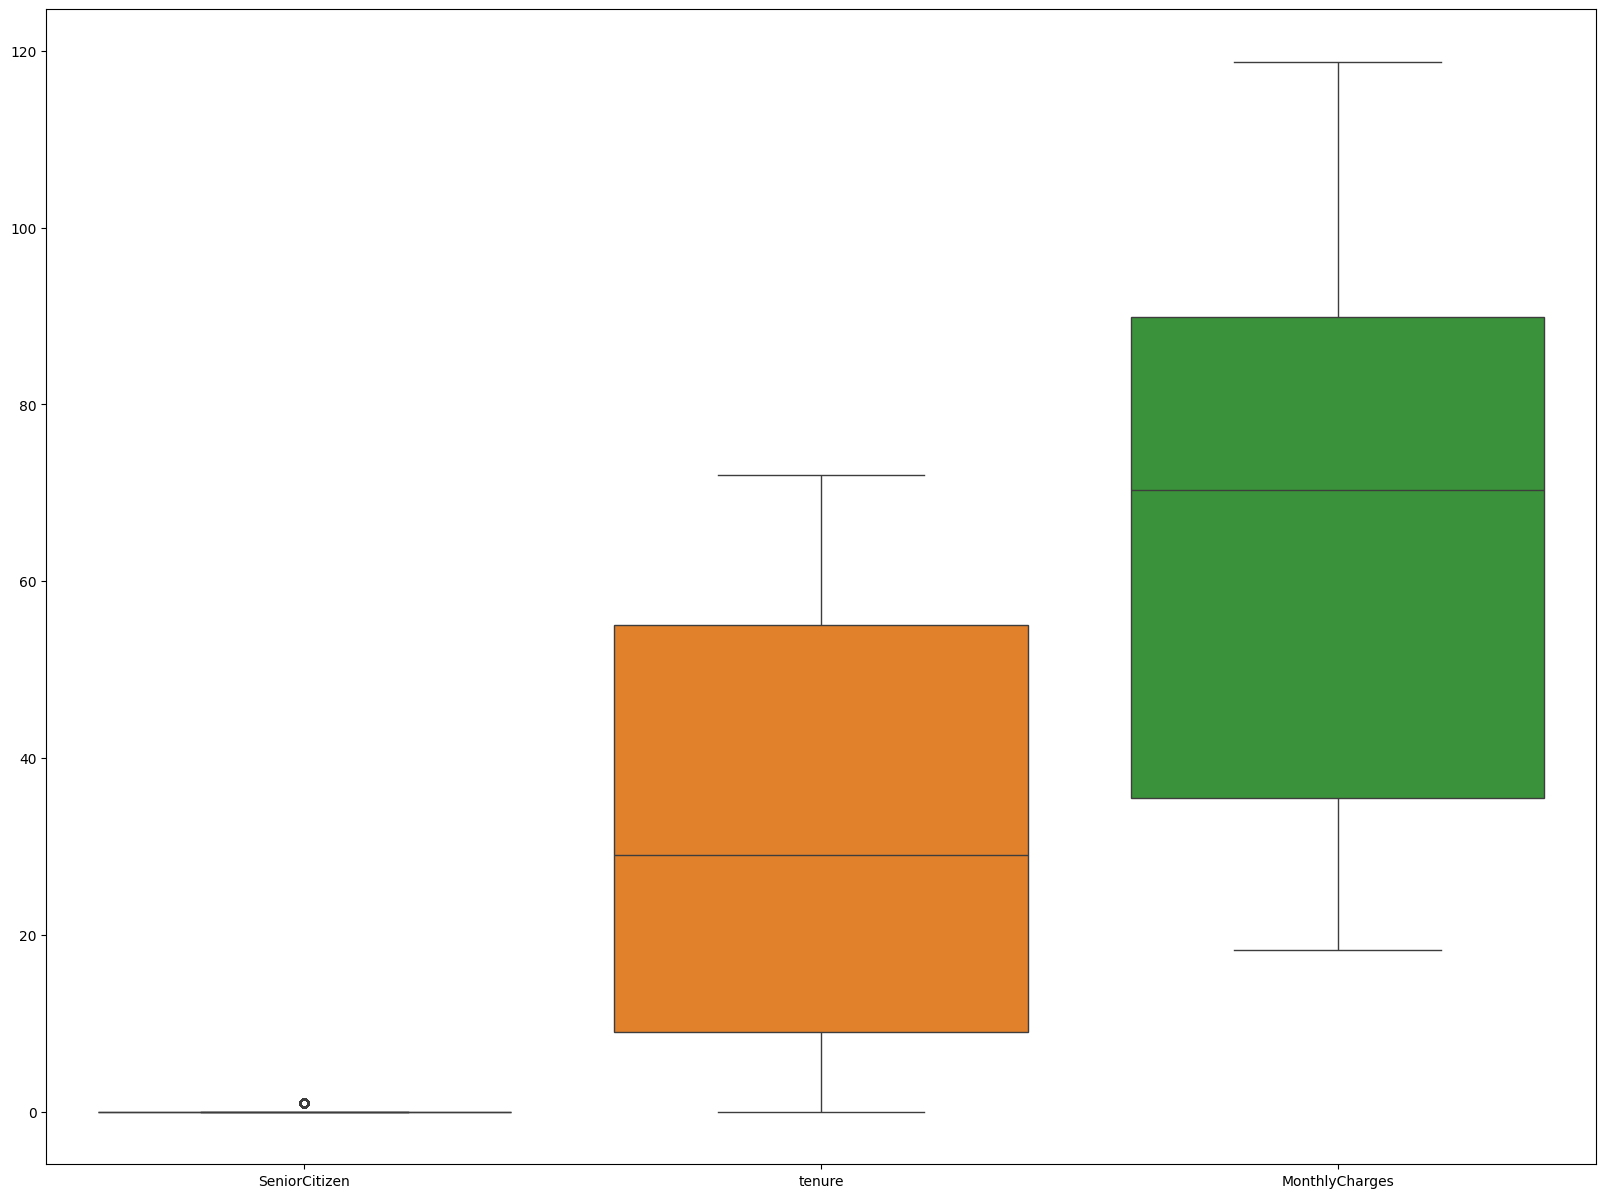

In [7]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.show()

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [9]:

Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]


In [10]:
df['tenure_years'] = df['tenure'] / 12
df = pd.get_dummies(df, drop_first=True)


In [11]:


scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [12]:

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
#  random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
# Evaluate random forest classifier

metrics_rf = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf),
    "recall": recall_score(y_test, y_pred_rf),
    "f1_score": f1_score(y_test, y_pred_rf)
}
metrics_rf

{'accuracy': 0.8048261178140526,
 'precision': 0.6929133858267716,
 'recall': 0.4718498659517426,
 'f1_score': 0.5614035087719298}

In [18]:

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



In [19]:
# Evaluate Logistic Regression model
metrics_lr = {
    "accuracy": accuracy_score(y_test, y_pred_lr),
    "precision": precision_score(y_test, y_pred_lr),
    "recall": recall_score(y_test, y_pred_lr),
    "f1_score": f1_score(y_test, y_pred_lr)
}

metrics_lr

{'accuracy': 0.8225691980127751,
 'precision': 0.6892307692307692,
 'recall': 0.6005361930294906,
 'f1_score': 0.6418338108882522}